In [59]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = [11, 4]


In [60]:
def basic_plot(df, x_axis, y_axis, title):
    df.plot()
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.legend()

In [61]:
def plot_by_date(df, group_col, date_col, x_axis, y_axis, title):
    new_df = df[[group_col, date_col]].value_counts().reset_index().pivot(columns=group_col, index=date_col)
    basic_plot(new_df, x_axis, y_axis, title)

In [62]:
# set filepaths (3 files)
isr_csv1 = '../data/ISR/01-JAN-2016 to 28-FEB-2017 - ISR - JUV Redacted.csv'
isr_csv2 = '../data/ISR/29-FEB-2016 thru 16-JAN-2018 - ISR - JUV Redacted.csv'
isr_csv3 = '../data/ISR/ISR-1-Jan-2018--31-Dec-2019-Juv-Redacted.csv'
csv_list = [isr_csv1, isr_csv2, isr_csv3]

In [63]:
# Load all files and concatenate into one
isr_dfs = []
for csv in csv_list:
    new_df = pd.read_csv(csv, low_memory=False)
    isr_dfs.append(new_df)
isr_raw_df = pd.concat(isr_dfs)

In [64]:
# Keep raw version
isr_raw_df.shape

(647021, 171)

In [65]:
# Remove redacted juvenile records
isr_df = isr_raw_df[isr_raw_df['CONTACT_DATE']!='REDACTED']
# Drop duplicates (Appear to be overlapping dates)
isr_df = isr_df.drop_duplicates()

In [66]:
isr_df.shape

(505579, 171)

In [67]:
isr_df['DATETIME'] = pd.to_datetime(isr_df['CONTACT_DATE'])

In [68]:
isr_df['DATETIME'].min()

Timestamp('2016-01-01 00:02:00')

In [69]:
isr_df['DATETIME'].max()

Timestamp('2019-12-31 23:55:00')

In [70]:
isr_df['DATE'] = isr_df['DATETIME'].dt.date

In [71]:
isr_df['MONTHYEAR'] = isr_df['DATETIME'].dt.to_period('M')

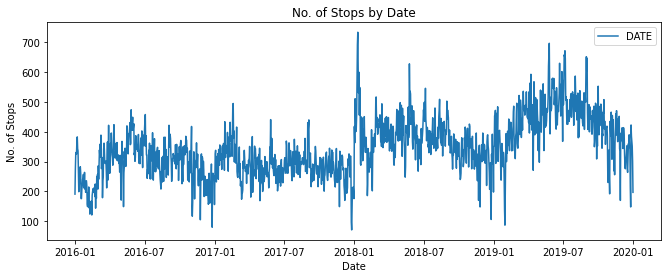

In [72]:
basic_plot(isr_df['DATE'].value_counts(), 'Date', 'No. of Stops', 'No. of Stops by Date')

We may need to look at dropping duplicates based on each CARD_NO. Each ISR is identified by a unique CARD_NO, but there may be revised records.  As a first step, let's use the most recent revision for a given CARD_NO.

In [73]:
# How many card numbers have multiple records?
sum(isr_df['CARD_NO'].value_counts()>1)

26147

In [74]:
isr_df['CARD_NO'].value_counts()

ISR000153909    8
ISR000201007    8
ISR000050767    8
ISR000130876    8
ISR000105034    8
               ..
ISR001251026    1
ISR000066135    1
ISR000462928    1
ISR001573422    1
ISR000616903    1
Name: CARD_NO, Length: 475184, dtype: int64

In [75]:
isr_df[isr_df['CARD_NO']=='ISR000201007'][['MODIFIED_DATE', 'ENFORCEMENT_TYPE_CD']]

,MODIFIED_DATE,ENFORCEMENT_TYPE_CD
25994,2/13/2017 5:10,NaN
25995,3/1/2017 1:45,NaN
25997,2/28/2017 18:07,NaN
25998,2/13/2017 20:52,NaN
94593,3/1/2017 1:45,NaN
94594,2/28/2017 18:07,NaN
94595,2/13/2017 5:10,NaN
94597,2/13/2017 20:52,NaN


In [76]:
test_df = isr_df[isr_df['CARD_NO']=='ISR000201007']

In [77]:
for col in test_df.columns:
    print(col, test_df.duplicated(subset=col).sum())

CONTACT_CARD_ID 4
CONTACT_TYPE_CD 7
CARD_NO 7
CONTACT_DATE 7
CONTACT_HOUR 7
SUBMITTING_BEAT_CD 7
JUVENILE_I 7
CLOTHING_DESCR 7
NAME_VERIFIED_I 6
RD_NO 6
HOTSPOT_NO 7
EVENT_NO 7
MISSION_NO 7
CPD_UNIT_NO 7
CREATED_BY 7
CREATED_DATE 7
MODIFIED_BY 7
MODIFIED_DATE 4
AGE 7
AGE_TO 7
SEX_CODE_CD 7
RACE_CODE_CD 7
HEIGHT 7
WEIGHT 7
BUILD_CODE_CD 7
EYE_COLOR_CODE_CD 7
HAIR_COLOR_CODE_CD 7
HAIR_STYLE_CODE_CD 7
COMPLEXION_CODE_CD 7
STREET_NO 7
STREET_DIRECTION_CD 7
STREET_NME 7
APT_NO 7
CITY 7
STATE_CD 7
ZIP_CD 7
HALF_ADDRESS_I 6
DISTRICT 7
SECTOR 7
BEAT 7
AREA 7
WARD 7
RES_DISTRICT 7
RES_SECTOR 7
RES_BEAT 7
RES_AREA 7
RES_WARD 7
BUS_DISTRICT 7
BUS_SECTOR 7
BUS_BEAT 7
BUS_AREA 7
BUS_WARD 7
SUBMITTING_UNIT 7
CONTACT_TYPE_DESCR 7
V_YEAR 7
MAKE_CD 7
MAKE_DESCR 7
STYLE_CD 7
STYLE_DESCR 7
TYPE_CD 7
MODEL_DESCR 7
COLOR_TOP 7
COLOR_BOTTOM 7
FO_EMPLOYEE_ID 7
SO_EMPLOYEE_ID 7
SUPV_EMPLOYEE_ID 6
GANG 7
KNOWN_HANGOUT 7
FACTION_NAME 7
CONTACT_CARD_STATUS_CD 6
COMPLETION_I 7
LOCATION_CD 7
HANDCUFFED_I 7
VEHICLE

In [78]:
isr_df['MODIFIED_DATETIME'] = pd.to_datetime(isr_df['MODIFIED_DATE'])

In [79]:
# Sort by date of record modification (descending)
isr_df = isr_df.sort_values(by='MODIFIED_DATETIME', ascending=False)

In [80]:
# Check for one example
isr_df[isr_df['CARD_NO']=='ISR000201007'][['CARD_NO', 'MODIFIED_DATETIME']]

,CARD_NO,MODIFIED_DATETIME
94593,ISR000201007,2017-03-01 01:45:00
25995,ISR000201007,2017-03-01 01:45:00
25997,ISR000201007,2017-02-28 18:07:00
94594,ISR000201007,2017-02-28 18:07:00
94597,ISR000201007,2017-02-13 20:52:00
25998,ISR000201007,2017-02-13 20:52:00
94595,ISR000201007,2017-02-13 05:10:00
25994,ISR000201007,2017-02-13 05:10:00


In [81]:
# Keep only most recent record per card number
isr_df = isr_df.drop_duplicates(subset = 'CARD_NO')

In [82]:
# Check the previous example card no.
isr_df[isr_df['CARD_NO']=='ISR000201007'][['CARD_NO', 'MODIFIED_DATETIME']]

,CARD_NO,MODIFIED_DATETIME
94593,ISR000201007,2017-03-01 01:45:00


In [83]:
isr_df.shape

(475184, 175)

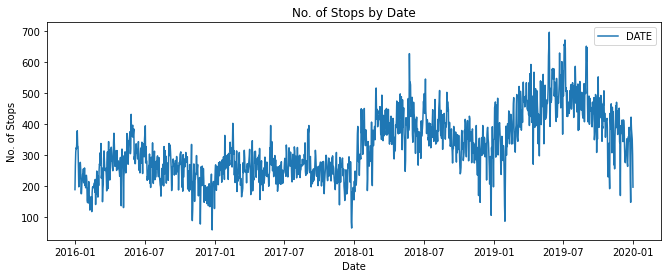

In [84]:
basic_plot(isr_df['DATE'].value_counts(), 'Date', 'No. of Stops', 'No. of Stops by Date')

Success - we've removed some of the weird spikes in the data!

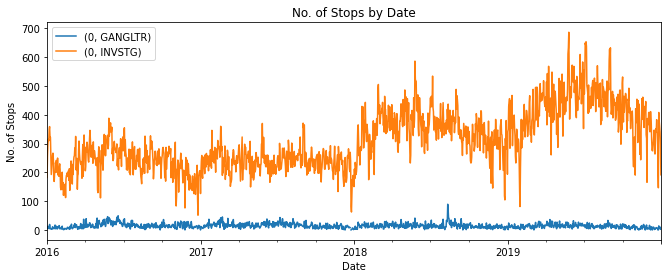

In [85]:
plot_by_date(isr_df, 'CONTACT_TYPE_CD', 'DATE', 'Date', 'No. of Stops', 'No. of Stops by Date')

### Look at some trends over time for different features

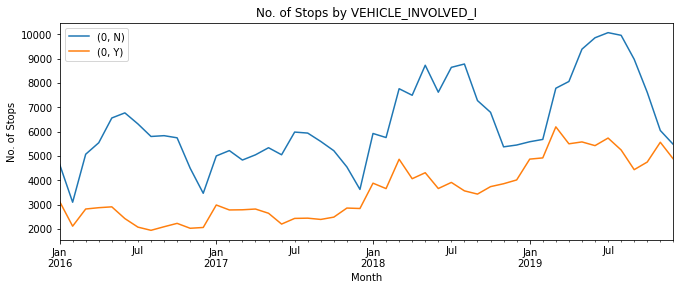

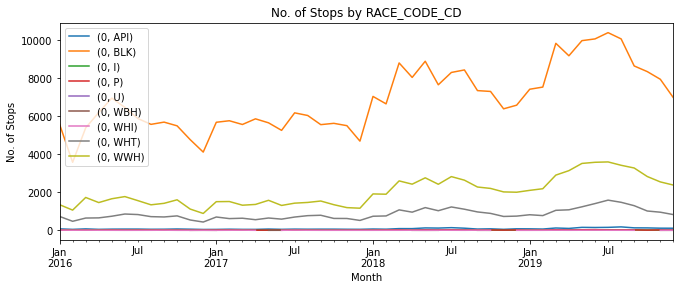

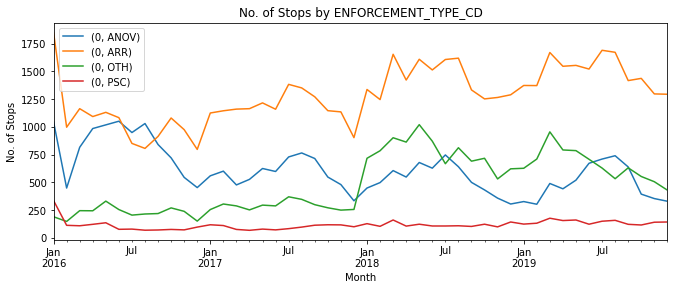

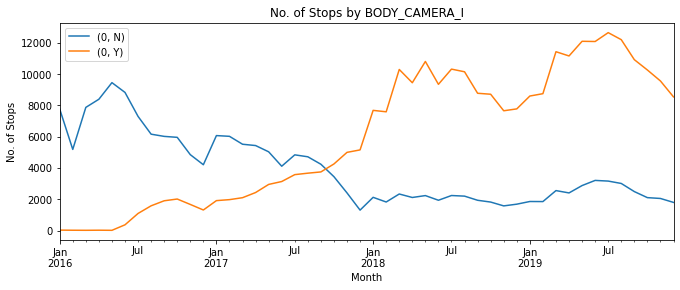

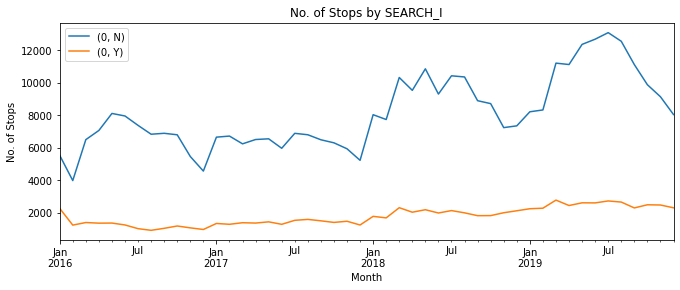

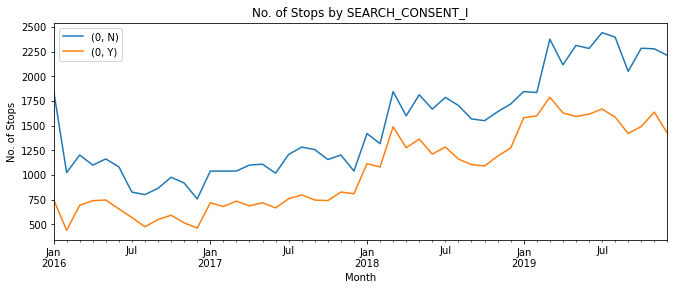

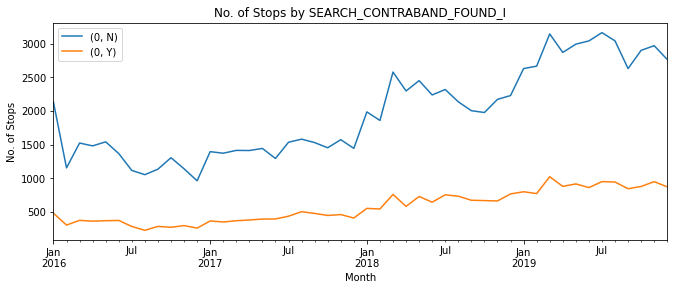

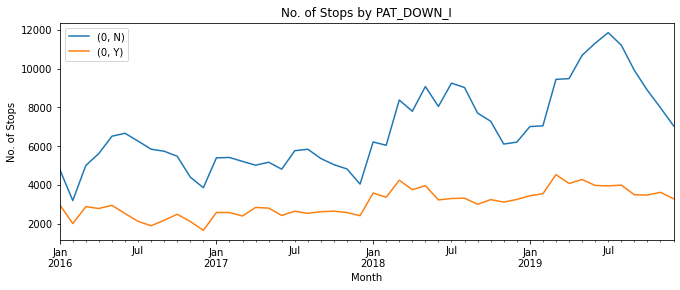

In [86]:
# Look at a few trends over time for different variables in the data
cols = ['VEHICLE_INVOLVED_I', 'RACE_CODE_CD', 'ENFORCEMENT_TYPE_CD', 'BODY_CAMERA_I', 
        'SEARCH_I', 'SEARCH_CONSENT_I', 'SEARCH_CONTRABAND_FOUND_I', 'PAT_DOWN_I']
for col_of_interest in cols:
    plot_by_date(isr_df, col_of_interest, 'MONTHYEAR', 'Month', 'No. of Stops', f'No. of Stops by {col_of_interest}')

### Look at stop and arrest frequencies for different geography levels

In [87]:
isr_df['ARREST'] = np.where(isr_df['ENFORCEMENT_TYPE_CD']=='ARR',1,0)

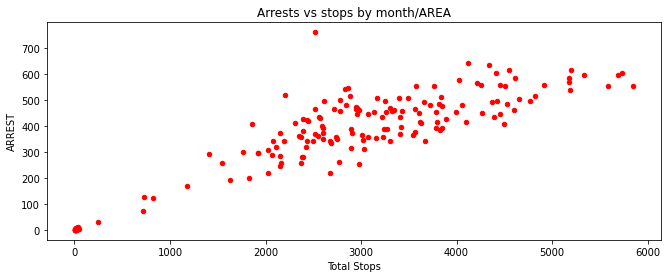

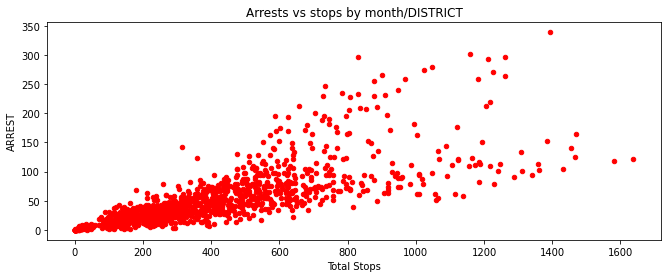

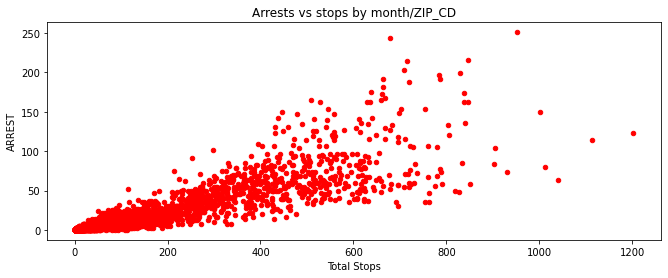

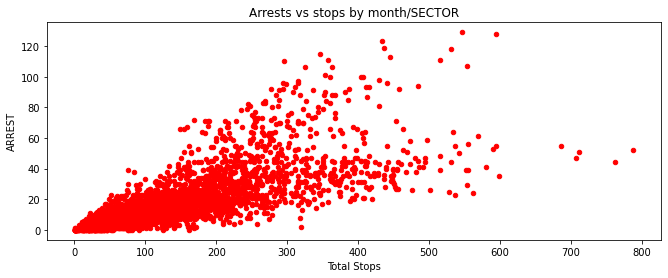

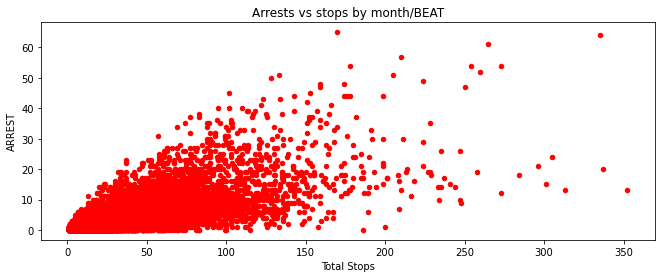

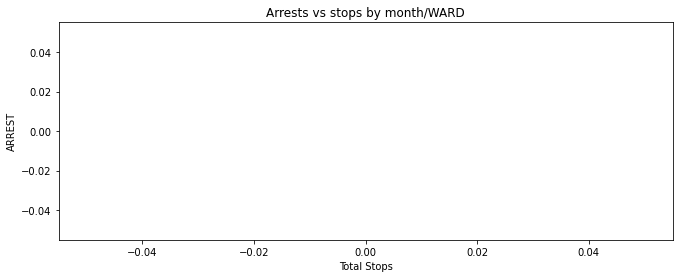

In [88]:
# Look at arrests v stops for different geo regions
for region in ['AREA','DISTRICT', 'ZIP_CD', 'SECTOR', 'BEAT', 'WARD']:
    arrests_by_zip = isr_df.groupby([region, 'MONTHYEAR']).agg({'ARREST': ['sum'], 'CARD_NO': ['count']}).reset_index()
    arrests_by_zip.plot(kind='scatter', y='ARREST', x='CARD_NO', color='red') 
    plt.xlabel('Total Stops')
    plt.title(f'Arrests vs stops by month/{region}')

## Create features at the beat/year level

In [89]:
# Add year as variable
isr_df['YEAR'] = isr_df['DATETIME'].dt.year

In [90]:
# enter categ columns to use - any others?
categ_cols = ['RACE_CODE_CD', 'ENFORCEMENT_TYPE_CD', 'CONTACT_TYPE_CD']

In [91]:
dummy_cols = pd.get_dummies(isr_df[categ_cols], columns = categ_cols, prefix = categ_cols).columns

In [92]:
isr_df = pd.get_dummies(isr_df, columns = categ_cols, prefix = categ_cols)

In [96]:
isr_df['TOTAL_COUNT'] = 'Y'

In [97]:
isr_df.describe()

,ARREST,YEAR,RACE_CODE_CD_API,RACE_CODE_CD_BLK,RACE_CODE_CD_I,RACE_CODE_CD_P,RACE_CODE_CD_U,RACE_CODE_CD_WBH,RACE_CODE_CD_WHI,RACE_CODE_CD_WHT,RACE_CODE_CD_WWH,ENFORCEMENT_TYPE_CD_ANOV,ENFORCEMENT_TYPE_CD_ARR,ENFORCEMENT_TYPE_CD_OTH,ENFORCEMENT_TYPE_CD_PSC,CONTACT_TYPE_CD_GANGLTR,CONTACT_TYPE_CD_INVSTG
count,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000,475184.000000
mean,0.130339,2017.748674,0.008462,0.697208,0.001488,0.001551,0.000013,0.000051,0.000349,0.086078,0.204794,0.061494,0.130339,0.049023,0.011941,0.046973,0.953025
std,0.336676,1.112995,0.091599,0.459467,0.038544,0.039352,0.003553,0.007107,0.018687,0.280480,0.403552,0.240235,0.336676,0.215917,0.108619,0.211582,0.211587
min,0.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2017.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,2018.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,2019.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,2019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [98]:
# enter binary cols to use - any others?
binary_cols = ['TOTAL_COUNT', 
               'VEHICLE_INVOLVED_I', 
               'BODY_CAMERA_I', 
               'SEARCH_I', 
               'SEARCH_CONTRABAND_FOUND_I', 
               'PAT_DOWN_I', 
               'ENFORCEMENT_ACTION_TAKEN_I']

In [99]:
# convert from y/n to 1/0
for col in binary_cols:
    isr_df[col] = np.where(isr_df[col]=='Y',1,0)

In [100]:
# combine into one list
binary_cols.extend(dummy_cols)
binary_cols

['TOTAL_COUNT',
 'VEHICLE_INVOLVED_I',
 'BODY_CAMERA_I',
 'SEARCH_I',
 'SEARCH_CONTRABAND_FOUND_I',
 'PAT_DOWN_I',
 'ENFORCEMENT_ACTION_TAKEN_I',
 'RACE_CODE_CD_API',
 'RACE_CODE_CD_BLK',
 'RACE_CODE_CD_I',
 'RACE_CODE_CD_P',
 'RACE_CODE_CD_U',
 'RACE_CODE_CD_WBH',
 'RACE_CODE_CD_WHI',
 'RACE_CODE_CD_WHT',
 'RACE_CODE_CD_WWH',
 'ENFORCEMENT_TYPE_CD_ANOV',
 'ENFORCEMENT_TYPE_CD_ARR',
 'ENFORCEMENT_TYPE_CD_OTH',
 'ENFORCEMENT_TYPE_CD_PSC',
 'CONTACT_TYPE_CD_GANGLTR',
 'CONTACT_TYPE_CD_INVSTG']

In [101]:
isr_df['BEAT']= pd.to_numeric(isr_df['BEAT'])

In [102]:
binary_cols.extend(['BEAT', 'YEAR'])
binary_cols

['TOTAL_COUNT',
 'VEHICLE_INVOLVED_I',
 'BODY_CAMERA_I',
 'SEARCH_I',
 'SEARCH_CONTRABAND_FOUND_I',
 'PAT_DOWN_I',
 'ENFORCEMENT_ACTION_TAKEN_I',
 'RACE_CODE_CD_API',
 'RACE_CODE_CD_BLK',
 'RACE_CODE_CD_I',
 'RACE_CODE_CD_P',
 'RACE_CODE_CD_U',
 'RACE_CODE_CD_WBH',
 'RACE_CODE_CD_WHI',
 'RACE_CODE_CD_WHT',
 'RACE_CODE_CD_WWH',
 'ENFORCEMENT_TYPE_CD_ANOV',
 'ENFORCEMENT_TYPE_CD_ARR',
 'ENFORCEMENT_TYPE_CD_OTH',
 'ENFORCEMENT_TYPE_CD_PSC',
 'CONTACT_TYPE_CD_GANGLTR',
 'CONTACT_TYPE_CD_INVSTG',
 'BEAT',
 'YEAR']

## Standardize for use with other data

In [103]:
isr_beat_yr = isr_df[binary_cols].groupby(['BEAT', 'YEAR']).sum().reset_index()

In [104]:
# Add hispanic indicator
isr_beat_yr['CNT_HISPANIC'] = isr_beat_yr['RACE_CODE_CD_WBH'] + isr_beat_yr['RACE_CODE_CD_WWH']

In [105]:
isr_beat_yr.columns

Index(['BEAT', 'YEAR', 'TOTAL_COUNT', 'VEHICLE_INVOLVED_I', 'BODY_CAMERA_I',
       'SEARCH_I', 'SEARCH_CONTRABAND_FOUND_I', 'PAT_DOWN_I',
       'ENFORCEMENT_ACTION_TAKEN_I', 'RACE_CODE_CD_API', 'RACE_CODE_CD_BLK',
       'RACE_CODE_CD_I', 'RACE_CODE_CD_P', 'RACE_CODE_CD_U',
       'RACE_CODE_CD_WBH', 'RACE_CODE_CD_WHI', 'RACE_CODE_CD_WHT',
       'RACE_CODE_CD_WWH', 'ENFORCEMENT_TYPE_CD_ANOV',
       'ENFORCEMENT_TYPE_CD_ARR', 'ENFORCEMENT_TYPE_CD_OTH',
       'ENFORCEMENT_TYPE_CD_PSC', 'CONTACT_TYPE_CD_GANGLTR',
       'CONTACT_TYPE_CD_INVSTG', 'CNT_HISPANIC'],
      dtype='object')

In [106]:
isr_beat_yr.dtypes

BEAT                          float64
YEAR                            int64
TOTAL_COUNT                     int64
VEHICLE_INVOLVED_I              int64
BODY_CAMERA_I                   int64
SEARCH_I                        int64
SEARCH_CONTRABAND_FOUND_I       int64
PAT_DOWN_I                      int64
ENFORCEMENT_ACTION_TAKEN_I      int64
RACE_CODE_CD_API              float64
RACE_CODE_CD_BLK              float64
RACE_CODE_CD_I                float64
RACE_CODE_CD_P                float64
RACE_CODE_CD_U                float64
RACE_CODE_CD_WBH              float64
RACE_CODE_CD_WHI              float64
RACE_CODE_CD_WHT              float64
RACE_CODE_CD_WWH              float64
ENFORCEMENT_TYPE_CD_ANOV      float64
ENFORCEMENT_TYPE_CD_ARR       float64
ENFORCEMENT_TYPE_CD_OTH       float64
ENFORCEMENT_TYPE_CD_PSC       float64
CONTACT_TYPE_CD_GANGLTR       float64
CONTACT_TYPE_CD_INVSTG        float64
CNT_HISPANIC                  float64
dtype: object

In [107]:
isr_beat_yr_export = isr_beat_yr[['BEAT',
                                  'YEAR',
                                  'TOTAL_COUNT',
                                  'SEARCH_I',
                                  'RACE_CODE_CD_BLK',
                                  'RACE_CODE_CD_WHT',
                                  'CNT_HISPANIC',
                                  'ENFORCEMENT_TYPE_CD_ARR']]

In [112]:
isr_beat_yr_export.columns =['BEAT',
                             'YEAR',
                             'TOTAL_STOPS',
                             'SEARCH',
                             'BLACK',
                             'WHITE',
                             'HISPANIC',
                             'ARREST']

In [113]:
isr_beat_yr_export.to_csv('../data/features/isr.csv', index=False)

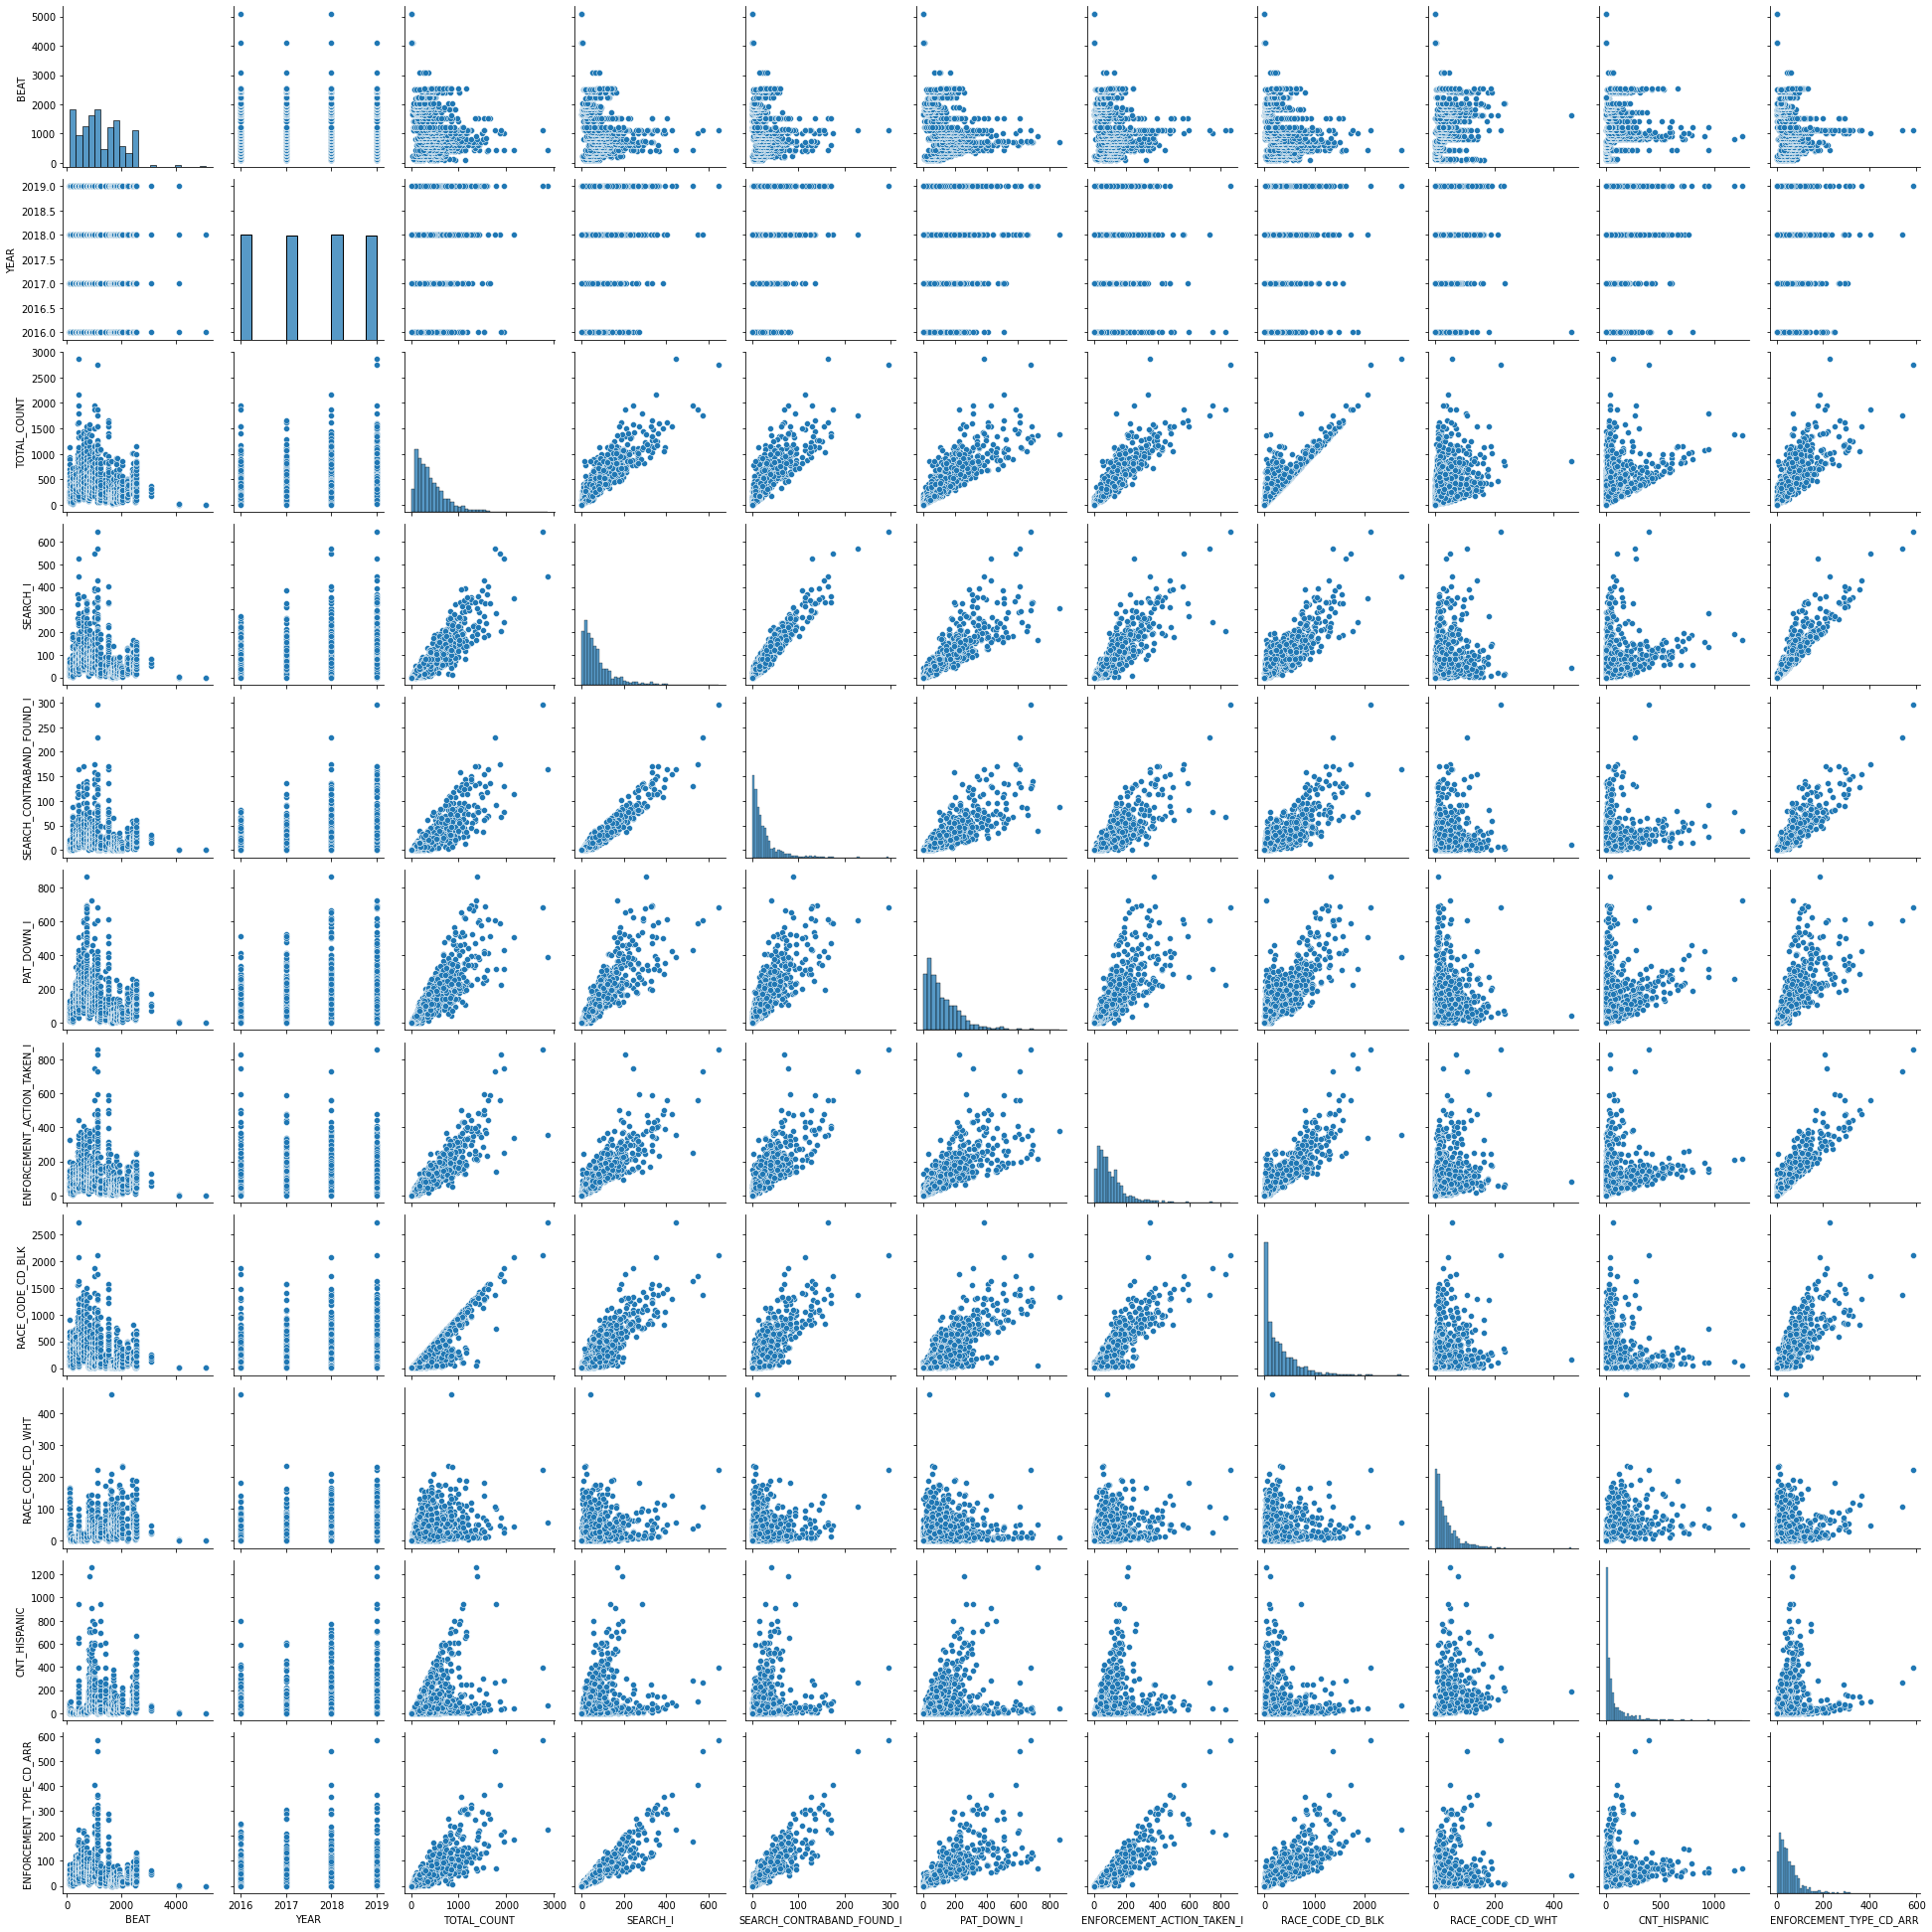

In [109]:
sns.pairplot(isr_beat_yr_export)

In [52]:
isr_beat_yr_export.describe()

,BEAT,YEAR,TOTAL_COUNT,SEARCH_I,SEARCH_CONTRABAND_FOUND_I,PAT_DOWN_I,ENFORCEMENT_ACTION_TAKEN_I,RACE_CODE_CD_BLK,RACE_CODE_CD_WHI,RACE_CODE_CD_WHT,CNT_HISPANIC,ENFORCEMENT_TYPE_CD_ARR
count,1106.000000,1106.000000,1106.0,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000,1106.000000
mean,1239.103074,2017.499096,0.0,77.148282,24.926763,132.669982,108.441230,299.549729,0.150090,36.982821,88.009946,55.999096
std,744.130173,1.118539,0.0,78.266581,30.079037,124.568818,99.604134,334.721444,0.437067,39.441883,142.336199,57.768840
min,111.000000,2016.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,633.000000,2016.250000,0.0,25.000000,6.000000,44.000000,43.000000,52.000000,0.000000,10.000000,9.000000,20.000000
50%,1131.000000,2017.500000,0.0,54.000000,15.000000,95.000000,82.000000,182.000000,0.000000,24.000000,33.000000,41.000000
75%,1813.000000,2018.000000,0.0,98.750000,32.000000,185.000000,141.000000,432.500000,0.000000,50.000000,101.000000,72.000000
max,5100.000000,2019.000000,0.0,645.000000,297.000000,862.000000,859.000000,2730.000000,4.000000,460.000000,1262.000000,586.000000
